## Python Tutorial: Part 3 - QIIME 2 Artifact API

We will explore the QIIME 2 Artifact API (https://docs.qiime2.org/2018.2/interfaces/artifact-api/). This API lets us import QIIME artifacts and convert them to Pandas DataFrames. Then we can do additional statistical analyses and plotting.

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from qiime2 import Artifact, Metadata
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
root = '.'

Note: The path variable `root` should be set to the location of the main working directory, for example `/wrk/student028`.

#### Metadata

In [3]:
df_metadata = pd.read_csv('%s/sample-metadata.tsv' % root, sep='\t', index_col=0, comment='#')

In [4]:
df_metadata.head()

,sequencing-run,sample-type,treatment-group,subject-id,week,study-status,GSRS,GSRSdiff,administration-route,age,gender,weight,height,BMI,Description
sample-id,,,,,,,,,,,,,,,
595e93ed.e4b3.42b5.91b1.1ad4f31e7134,1,stool,treatment,B101,0,pre-treatment,2.9,0.0,Oral,12.5,m,63.0,55.0,14.8,595e93ed.e4b3.42b5.91b1.1ad4f31e7134
bd64992d.87cc.464f.9e1b.9c0156ed65d8,1,stool,treatment,B101,3,NaN,1.8,-1.1,Oral,12.5,m,63.0,55.0,14.8,bd64992d.87cc.464f.9e1b.9c0156ed65d8
e7a2370c.f80c.4703.b2ee.10c65967e05f,1,stool,treatment,B101,10,NaN,1.3,-1.6,Oral,12.5,m,63.0,55.0,14.8,e7a2370c.f80c.4703.b2ee.10c65967e05f
11f3f37a.3698.4031.8183.75f6f2c6c04c,1,stool,treatment,B101,18,post-treatment,1.3,-1.6,Oral,12.5,m,63.0,55.0,14.8,11f3f37a.3698.4031.8183.75f6f2c6c04c
fa2e9bcc.cc53.4b83.ad1e.a308375854f5,1,swab,treatment,B101,0,NaN,2.9,0.0,Oral,12.5,m,63.0,55.0,14.8,fa2e9bcc.cc53.4b83.ad1e.a308375854f5


In [5]:
df_metadata['treatment-group'].value_counts()

treatment    72
control      44
donor         5
Name: treatment-group, dtype: int64

In [6]:
df_metadata['sequencing-run'].value_counts()

1    73
2    48
Name: sequencing-run, dtype: int64

#### Seaborn box plots: alpha-diversity data

In [7]:
path_adiv = '%s/core-metrics/observed_otus_vector.qza' % root
adiv = Artifact.load(path_adiv)
df_adiv = adiv.view(pd.Series)

In [8]:
df_adiv.head()

0bb5e24a.aa34.48e7.b1f9.e761ac2dc6b4    78
101c02ce.4f8d.4394.83a3.0c406831d934    70
104e5902.1c3e.417f.bb22.124bfca61a61    74
11c4be47.fdce.4135.8acf.0894f2da5ede    41
11c70d46.e0a4.4797.ad7b.3677fe93d73b    31
Name: observed_otus, dtype: int64

In [9]:
df_metadata['adiv_observed_otus'] = [df_adiv[x] if x in df_adiv.index else np.nan for x in df_metadata.index]

In [10]:
df_metadata.head()

,sequencing-run,sample-type,treatment-group,subject-id,week,study-status,GSRS,GSRSdiff,administration-route,age,gender,weight,height,BMI,Description,adiv_observed_otus
sample-id,,,,,,,,,,,,,,,,
595e93ed.e4b3.42b5.91b1.1ad4f31e7134,1,stool,treatment,B101,0,pre-treatment,2.9,0.0,Oral,12.5,m,63.0,55.0,14.8,595e93ed.e4b3.42b5.91b1.1ad4f31e7134,44.0
bd64992d.87cc.464f.9e1b.9c0156ed65d8,1,stool,treatment,B101,3,NaN,1.8,-1.1,Oral,12.5,m,63.0,55.0,14.8,bd64992d.87cc.464f.9e1b.9c0156ed65d8,60.0
e7a2370c.f80c.4703.b2ee.10c65967e05f,1,stool,treatment,B101,10,NaN,1.3,-1.6,Oral,12.5,m,63.0,55.0,14.8,e7a2370c.f80c.4703.b2ee.10c65967e05f,61.0
11f3f37a.3698.4031.8183.75f6f2c6c04c,1,stool,treatment,B101,18,post-treatment,1.3,-1.6,Oral,12.5,m,63.0,55.0,14.8,11f3f37a.3698.4031.8183.75f6f2c6c04c,69.0
fa2e9bcc.cc53.4b83.ad1e.a308375854f5,1,swab,treatment,B101,0,NaN,2.9,0.0,Oral,12.5,m,63.0,55.0,14.8,fa2e9bcc.cc53.4b83.ad1e.a308375854f5,25.0


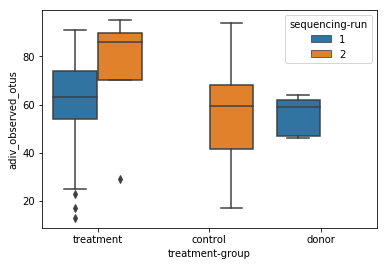

In [11]:
sns.boxplot(x='treatment-group', y='adiv_observed_otus', hue='sequencing-run', data=df_metadata)

#### Matplotlib scatter plots: principal coordinates analysis

In [12]:
path_pcoa = '%s/core-metrics/unweighted_unifrac_pcoa_results.qza' % root
pcoa = Artifact.load(path_pcoa)
md = pcoa.view(Metadata)
df_pcoa = md.to_dataframe()

In [13]:
df_pcoa.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8,Axis 9,Axis 10,...,Axis 109,Axis 110,Axis 111,Axis 112,Axis 113,Axis 114,Axis 115,Axis 116,Axis 117,Axis 118
Sample ID,,,,,,,,,,,,,,,,,,,,,
0bb5e24a.aa34.48e7.b1f9.e761ac2dc6b4,-0.180510,0.116028,0.093419,-0.135996,0.070218,0.077625,-0.103804,0.050598,0.019875,0.089550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101c02ce.4f8d.4394.83a3.0c406831d934,-0.104124,0.237081,-0.099451,-0.003314,0.060325,-0.028848,0.011997,-0.052057,0.012310,-0.109833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104e5902.1c3e.417f.bb22.124bfca61a61,-0.112473,0.144149,0.006998,0.009583,0.071556,-0.082625,-0.136089,0.070029,-0.073314,0.001871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11c4be47.fdce.4135.8acf.0894f2da5ede,0.154583,0.112591,-0.011351,-0.059896,0.020293,-0.023264,0.064711,-0.131008,-0.139828,0.029993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11c70d46.e0a4.4797.ad7b.3677fe93d73b,0.209189,0.038827,0.065399,-0.063647,0.013532,-0.016088,0.009035,0.081464,0.119406,0.015526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
color_dict = {'treatment': 'red', 'donor': 'blue', 'control': 'orange'}

In [15]:
treatment_colors = [color_dict[df_metadata.loc[x, 'treatment-group']] for x in df_pcoa.index]

Text(0,0.5,'PC2')

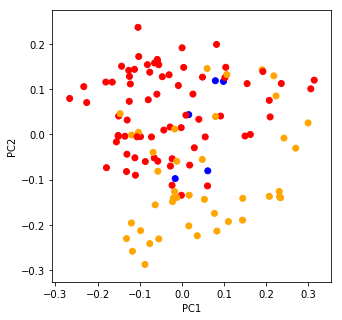

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_pcoa['Axis 1'], df_pcoa['Axis 2'], c=treatment_colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')